### Trends and cycles
#### Trends in the Swiss temperature data
We use the monthly Swiss temperature data from the previous unit. The data describes the average temperature measured at various altitudes in Switzerland from 1864 to 2020. We repeat the same steps as in the exercise to create a dataframe where each row represents a month.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# load the data
data = pd.read_csv(
    "c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt",
    index_col="time",
    sep="\t",
    skiprows=15,
)

# Print the shape of the dataframe
print(data.shape)

# Select the first 12 columns
data_m = data.loc[:, "jan":"dec"]

# Create a new dataframe with new index and columns 'Year', 'Month' and 'Temp'
df = (
    data_m.stack()  # create a multi-index dataframe with the year at level 0 and the month at level 1
    .reset_index()  # reset the index of the new dataframe
    .rename(
        columns={0: "Temp", "time": "Year", "level_1": "Month"}
    )  # give new names to the columns
)
# Create dates
df["Date"] = pd.date_range("1864-jan", periods=df.shape[0], freq="M")

# Let the dates to be the index
df.set_index("Date", inplace=True)
df.head()

(157, 19)


,Year,Month,Temp
Date,,,
1864-01-31,1864,jan,-7.10
1864-02-29,1864,feb,-4.52
1864-03-31,1864,mar,0.04
1864-04-30,1864,apr,2.11
1864-05-31,1864,may,7.43


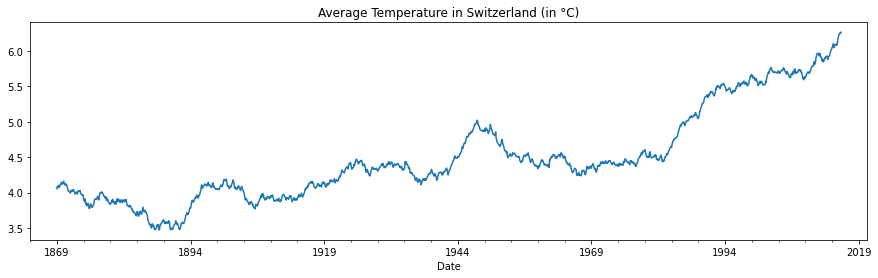

In [5]:
# Let’s check the pattern that results from a 10 years rolling window.
# set the figure size
plt.figure(figsize=(15, 4))

# plot the Temperature
df["Temp"].rolling(120, center=True).mean().plot()  # 120 months : 10 years
plt.title("Average Temperature in Switzerland (in °C)")
plt.show()

The plot shows many ups and downs over many sub-periods, but in general, it has an upward trend over the whole period. In particular, since 1985, the average temperature is increasing most of the time. Next, we explore cyclical variations.

#### Seasonality in the Swiss temperature data
In general, temperature data exhibits cycles with a fixed frequency i.e. they show seasonal variations. Below, we show a few graphical ways to explore trends and seasonality in the Swiss temperature data.

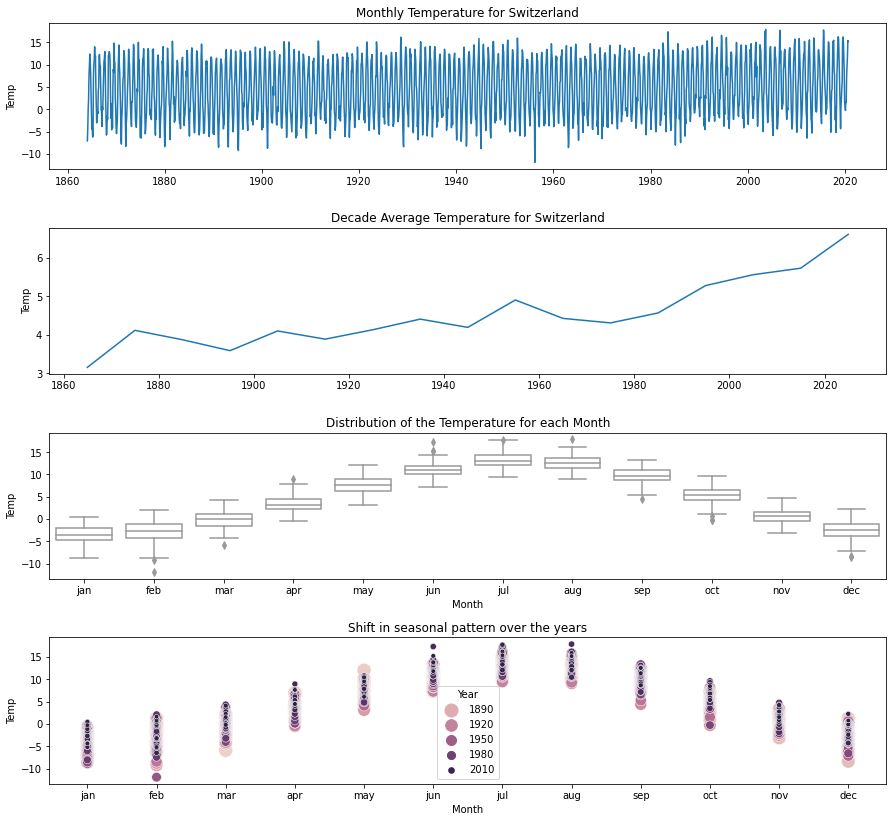

In [8]:
# defining the number of subplots, setting the size, and the space between the subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 14), gridspec_kw={"hspace": 0.4})

# 1st plot: line plot of monthly temperature
axes[0].plot(df["Temp"])
axes[0].set_title("Monthly Temperature for Switzerland")
axes[0].set_ylabel("Temp")

# 2nd plot: line plot of average temperature per decade (A: annual)
axes[1].plot(df["Temp"].resample("10A").mean())
axes[1].set_title("Decade Average Temperature for Switzerland")
axes[1].set_ylabel("Temp")

# 3rd plot: box plot of monthly temperature for every month
sns.boxplot(data=df, x="Month", y="Temp", color="white", ax=axes[2])
axes[2].set_title("Distribution of the Temperature for each Month")

# 4th plot: scatter plot of monthly temperature against month
sns.scatterplot(data=df, x="Month", y="Temp", hue="Year", size="Year", sizes=(200, 20))
axes[3].set_title("Shift in seasonal pattern over the years")

plt.show()

- The plot on the top reveals strong seasonal variations in the monthly temperatures from 1864 to 2020.
- The second plot shows that by taking the average of the monthly values in each decade, we can smooth out all the seasonalities and reveal an upward and long-term trend in temperature over the whole period. 
- The last two plots focus on the seasonal component that is very strong and is repeating every year. The repetitive peaks show the months with the highest temperature each year (often July). The repetitive minimum values show the months with the lowest temperature each year (usually January). 
- The boxplot also shows the temperature distribution for each month. In particular, it shows that some winters were extremely cold, and some summers were very hot. The last plot shows that the seasonal pattern has shifted up over the most recent decades.

Cycles with a fixed frequency are referred to as seasonalities because they are associated with some aspect of the calendar and happen at a fixed frequency (e.g. weather temperature). On the other hand, some phenomena show cyclical patterns with varying frequencies (e.g. business cycles)

### Temporal dependencies in time series data
This temporal (time) dependency is also called autocorrelation or serial correlation. Similar to the correlation between two variables, autocorrelation measures the correlation across time periods within a single variable.

#### Time dependency in the unemployment rates
Let’s check the quarterly unemployment rates (in percentage) for Switzerland from 1970 to 2019. The idea is to see if the unemployment rate at every quarter depends on the past rates. The ‘past’ can be just the previous quarter, or 2 quarters ago, or even 3 or 4 quarters ago. In the case of the past 4 quarters, we are checking if the current quarter’s rate depends on the rate of the same quarter but in the previous year. In the following, we visually inspect this idea.

In [9]:
# load unemployment rates
data = pd.read_csv("c2_LMUNRRTTCHQ156S.csv", index_col="DATE")
data.index = pd.to_datetime(data.index, format="%Y-%m-%d")

print(data.shape)
# check a few values at the end of the data
data.tail()

(197, 1)


,LMUNRRTTCHQ156S
DATE,
2018-01-01,2.880751
2018-04-01,2.656838
2018-07-01,2.544365
2018-10-01,2.446708
2019-01-01,2.393524


In [10]:
# let's get more information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 1970-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LMUNRRTTCHQ156S  197 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


The index is already a DatetimeIndex.

Now, let’s make scatter plots of the data with itself but when they are lagged by 1,2 and 3 quarters.

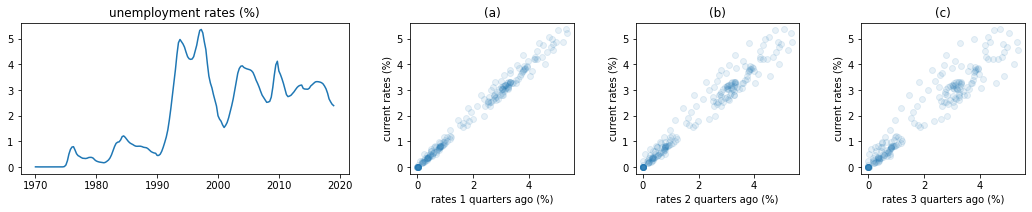

In [11]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=4, # presentation of the subplots
    figsize=(18, 3),
    gridspec_kw={"wspace": 0.3, "width_ratios": [2, 1, 1, 1]}, #Width difference between the plots
)

# the first plot on the left
axes[0].plot(data)
axes[0].set(title="unemployment rates (%)")

for (ax, lag, t) in zip(axes[1:].flatten(),     # get the axes, ignore axes[0], it is already plotted and titled 
                        [1, 2, 3],              # get the lags of 1,2 and 3 quarters in 'lag'
                        ["(a)", "(b)", "(c)"]): # get the titles in 't'

    ax.scatter(data[:-lag], data[lag:], alpha=0.1)  # is the unemployment rates which is shifted forward by the number of lags
    ax.set(                                         # To draw the scatter plot we should have equal number of observations in both x and y axes and therefore we should drop the last observation in data[:-lag]
        xlabel="rates " + str(lag) + " quarters ago (%)",
        ylabel="current rates (%)",
        title=str(t),
    )
    
# adjust the spaces
fig.subplots_adjust(bottom=0.2, top=0.9)
plt.show()

The first plot from the left shows the evolution of the unemployment rates over time. We note that in plot (a), the rates in the two consecutive quarters are closely related. This is expected because it is unlikely that the rates change rapidly from one quarter to the next. However, this time dependency is less strong in plots (b) and (c), i.e. autocorrelation becomes weaker.

#### Pandas function for visualization of time dependency
Instead of using the scatter plot to plot the time series data against its lagged values, we can use the lag_plot from Pandas. The advantage of using the lag_plot is that we don’t need to create the lagged data manually. In the following, we visualize the temporal dependencies in several time series data: stock prices, gross domestic product (GDP), temperature and random samples generated from standard normal distribution.

Let’s load these data first.

In [12]:
from pandas.plotting import lag_plot

# load stock prices
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")
prices = data["Close"]

# load GDP data
gdp = pd.read_csv("c2_CPMNACSAB1GQCH.csv", index_col="DATE")
gdp.index = pd.to_datetime(gdp.index, format="%Y-%m-%d")

#  load temperature data
temp = pd.read_csv(
    "c2_daily-min-temperatures.txt", parse_dates=["Date"], index_col="Date"
)

# generate random numbers from standard normal distribution
np.random.seed(5)
data_numbers = pd.DataFrame(
    np.random.normal(size=240),
    columns=["random_numbers"],
    index=pd.date_range("2001-jan", periods=240, freq="M"),
)

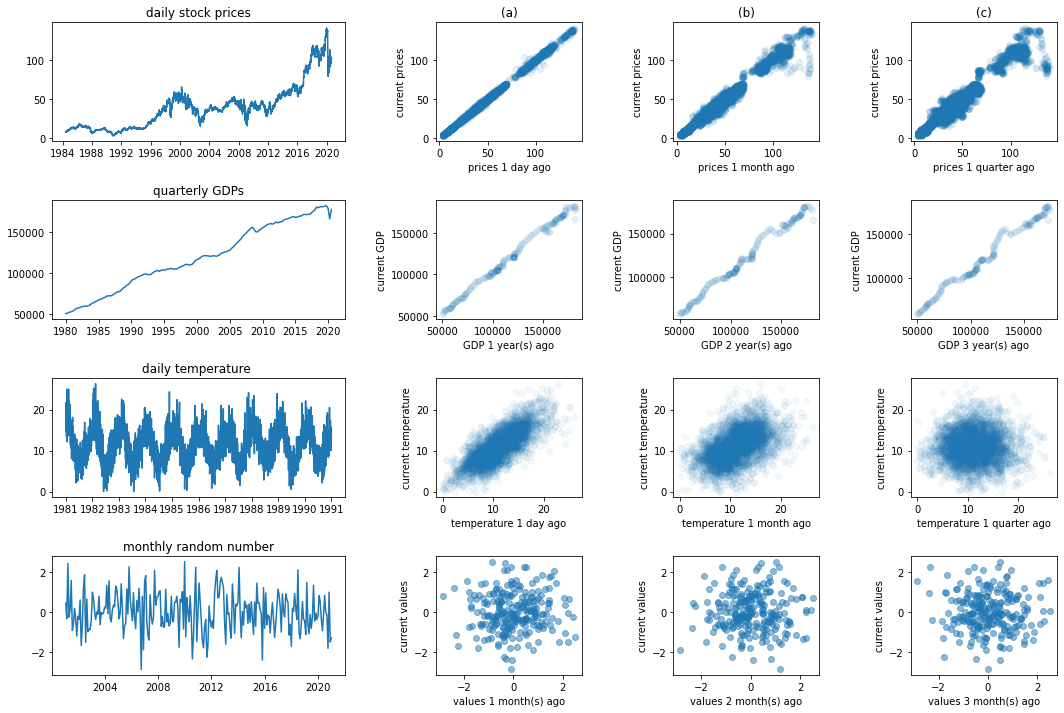

In [13]:
# Using lagplot()
fig, axes = plt.subplots(
    nrows=4,
    ncols=4,
    figsize=(18, 12),
    gridspec_kw={"hspace": 0.5, "wspace": 0.5, "width_ratios": [2, 1, 1, 1]},
)

# plot data in the first column
# axes goes from row 0 to row 3, but the column remains 0
axes[0, 0].plot(prices)
axes[1, 0].plot(gdp)
axes[2, 0].plot(temp)
axes[3, 0].plot(data_numbers)

# set titles for the plots in the first column
axes[0, 0].set(title="daily stock prices")
axes[1, 0].set(title="quarterly GDPs")
axes[2, 0].set(title="daily temperature ")
axes[3, 0].set(title="monthly random number")

#  plot stock prices
for (ax, lag, _lag, t) in zip(
    axes[0, 1:].flatten(),                            # Define the subplot with axes
    [1, 21, 61],                                      # Number of days in each subgroup of lagged information (day is the minimum unit in the db)
    ["day", "month", "quarter"],                      # Define the period's label
    ["(a)", "(b)", "(c)"],                            # Define the titles
):

    lag_plot(prices, lag=lag, ax=ax, alpha=0.1)
    ax.set(
        xlabel="prices 1 " + str(_lag) + " ago",      # Set the names of x axis
        ylabel="current prices",                      # Set the y axis
        title=str(t),
    )

#  plot GDP data
for (ax, lag) in zip(axes[1, 1:].flatten(), [4, 8, 12]):                                         # Define periods of lags (1 year is 4 quarters)

    lag_plot(gdp, lag=lag, ax=ax, alpha=0.1)
    ax.set(xlabel="GDP " + str(int(lag / 4)) + " year(s) ago", ylabel="current GDP")             # Labels in plots

#  plot temperature data
for (ax, lag, _lag) in zip(
    axes[2, 1:].flatten(), [1, 30, 90], ["day", "month", "quarter"]                              # Define periods of lags
):

    lag_plot(temp, lag=lag, ax=ax, alpha=0.05)
    ax.set(xlabel="temperature 1 " + str(_lag) + " ago", ylabel="current temperature")           

# plot random numbers
for (ax, lag) in zip(axes[3, 1:].flatten(), [1, 2, 3]):                                          # Define periods of lags according to the minimum date value in df

    lag_plot(data_numbers, lag=lag, ax=ax, alpha=0.5)
    ax.set(xlabel="values " + str(lag) + " month(s) ago", ylabel="current values")

plt.show()

Each row in the above visualization belongs to a different dataset. In the first row, stock prices (in dollars) are shown along with three lag plots in columns (a) to (c). The lag plot in column (a) shows that prices in two consecutive days are strongly related. This relationship is less strong for the plot in column (c), where the lag is one quarter rather than one day.

The first plot in the second row shows the upward trend in the GDP of Switzerland in millions CHF. The lag plot in column (a) shows that GDP values in two consecutive years are strongly related to each other. The lags in columns (b) and (c) are 2 and 3 years rather than just 1 year, which results in less strong dependencies. Overall, the relationships remain strong across the three lags because GDP is measured quarterly and slowly changes over the years.

The first plot in the third row reveals the seasonality of Melbourne’s daily temperatures. The lag plot in column (a) shows that the temperatures of two consecutive days are strongly related, whereas the temperatures of two consecutive quarters in plot (c) are not related.

Finally, the last row shows the pattern and lag plots for the random values from the normal distribution. The lag plots in columns (a) to (c) show that, as expected, there is no relation between the values no matter what the lag value is.